# NLP Project #2

We'll classify [Yelp Reviews](https://www.kaggle.com/c/yelp-recsys-2013) into 1 or 5 stars categories based on the text content of the reviews.

## Data and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp = pd.read_csv('../data/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
# New 'length' feature

yelp['text lenght'] = yelp['text'].apply(lambda text: len(text))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

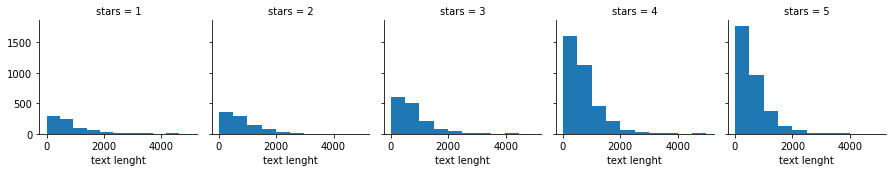

In [7]:
g = sns.FacetGrid(data=yelp,col='stars',height=2.5,aspect=1)
g.map(plt.hist, 'text lenght', bins=10)

<AxesSubplot:xlabel='stars', ylabel='text lenght'>

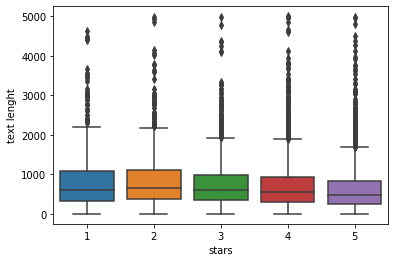

In [8]:
sns.boxplot(data=yelp,x='stars',y='text lenght')

<AxesSubplot:xlabel='stars', ylabel='count'>

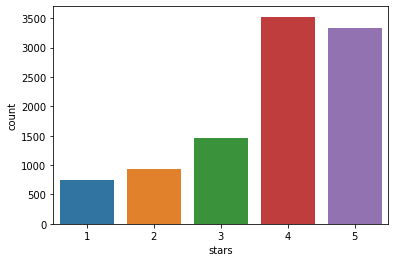

In [9]:
sns.countplot(x='stars',data=yelp)

In [10]:
grouped_by_stars = yelp.groupby(by='stars',as_index=True).mean()
grouped_by_stars

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [11]:
grouped_by_stars.corr()

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text lenght,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

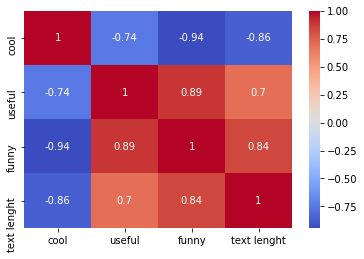

In [12]:
sns.heatmap(grouped_by_stars.corr(),annot=True,cmap='coolwarm')

## NLP Classification Task

- We'll limit the exercise to the reviews with either 1 or 5 stars

In [13]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [14]:
X = yelp_class['text']
y = yelp_class['stars']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [16]:
X = count_vect.fit_transform(X)
X

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

## Model
### Training and testing data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the model

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [20]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predicting and evaluating the model

In [21]:
pred = nb.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print (confusion_matrix(y_test, pred))
print ('\n')
print (classification_report(y_test, pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



----
## Using Text Processing

We'll try to improve the model using [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf) transformer

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipeline = Pipeline([
    ('count_vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['text'], yelp_class['stars'])

In [27]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('count_vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [28]:
predict_new = pipeline.predict(X_test)
print (confusion_matrix(y_test, predict_new))
print ('\n')
print (classification_report(y_test, predict_new,zero_division=0))

[[  1 193]
 [  0 828]]


              precision    recall  f1-score   support

           1       1.00      0.01      0.01       194
           5       0.81      1.00      0.90       828

    accuracy                           0.81      1022
   macro avg       0.91      0.50      0.45      1022
weighted avg       0.85      0.81      0.73      1022



In [29]:
# Using the TF-ID transformer actually made things worst